Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

2022-09-09 16:37:21.645470: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-09 16:37:21.649109: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-09 16:37:21.649212: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:975] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-09 16:37:21.649470: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags



Found 1027 images belonging to 2 classes.
Epoch 1/15


2022-09-09 16:37:24.452028: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8101
2022-09-09 16:37:25.834713: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


8/8 - 8s - loss: 0.7687 - accuracy: 0.5557 - 8s/epoch - 980ms/step
Epoch 2/15
8/8 - 4s - loss: 0.7508 - accuracy: 0.6385 - 4s/epoch - 516ms/step
Epoch 3/15
8/8 - 4s - loss: 0.6046 - accuracy: 0.7097 - 4s/epoch - 508ms/step
Epoch 4/15
8/8 - 4s - loss: 0.7229 - accuracy: 0.7419 - 4s/epoch - 497ms/step
Epoch 5/15
8/8 - 4s - loss: 0.6838 - accuracy: 0.7675 - 4s/epoch - 507ms/step
Epoch 6/15
8/8 - 4s - loss: 0.2905 - accuracy: 0.8977 - 4s/epoch - 506ms/step
Epoch 7/15
8/8 - 4s - loss: 0.2968 - accuracy: 0.8754 - 4s/epoch - 511ms/step
Epoch 8/15
8/8 - 4s - loss: 0.0803 - accuracy: 0.9755 - 4s/epoch - 501ms/step
Epoch 9/15
8/8 - 4s - loss: 0.2649 - accuracy: 0.9132 - 4s/epoch - 507ms/step
Epoch 10/15
8/8 - 4s - loss: 0.2155 - accuracy: 0.9499 - 4s/epoch - 506ms/step
Epoch 11/15
8/8 - 4s - loss: 0.1875 - accuracy: 0.9377 - 4s/epoch - 505ms/step
Epoch 12/15
8/8 - 4s - loss: 0.0433 - accuracy: 0.9867 - 4s/epoch - 506ms/step
Epoch 13/15
8/8 - 4s - loss: 0.0104 - accuracy: 0.9978 - 4s/epoch - 496m

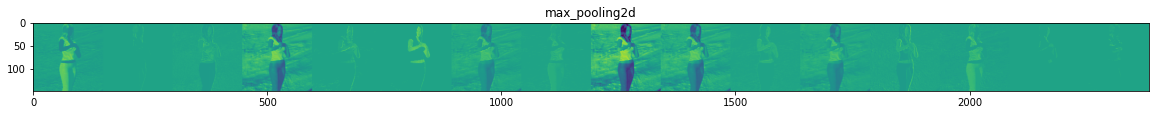

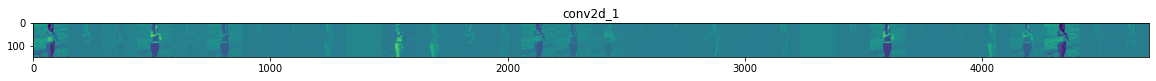

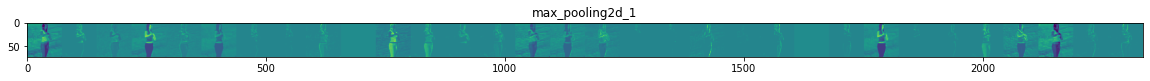

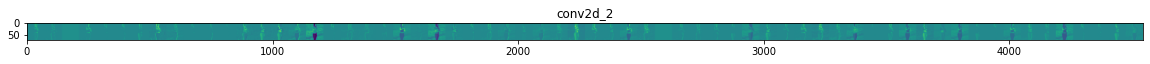

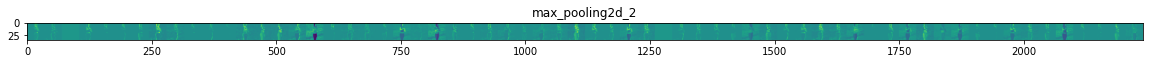

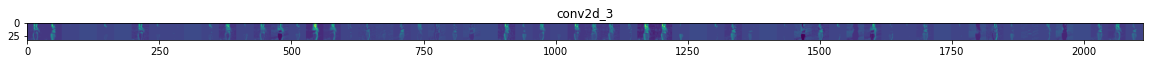

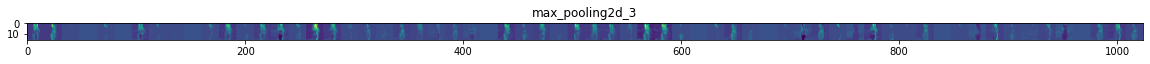

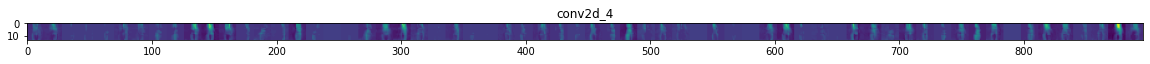

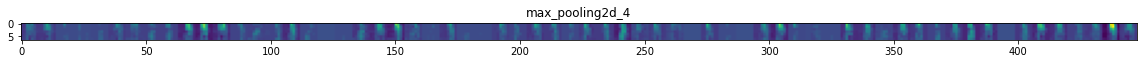

In [1]:
import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    keras.layers.Conv2D(16, (3,3), activation=tf.nn.relu, input_shape=(300,300,3)),
    keras.layers.MaxPooling2D(2,2),
    # This is the second convolution
    keras.layers.Conv2D(32,(3,3), activation=tf.nn.relu),
    keras.layers.MaxPooling2D(2,2),
    # This is the third convolution
    keras.layers.Conv2D(64,(3,3), activation=tf.nn.relu),
    keras.layers.MaxPooling2D(2,2),
    # This is the fourth convolution
    keras.layers.Conv2D(64,(3,3), activation=tf.nn.relu), 
    keras.layers.MaxPooling2D(2,2),
    # This is the fifth convolution
    keras.layers.Conv2D(64,(3,3), activation=tf.nn.relu),
    keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN 
    keras.layers.Flatten(),
    # 512 neuron hidden layer
    keras.layers.Dense(512, activation=tf.nn.relu),
    keras.layers.Dense(1, activation='sigmoid') # more efficient than softmax in binary classification
])

model.summary()

print('\n')

from keras.optimizers import RMSprop

model.compile(
    loss='binary_crossentropy',
    optimizer=RMSprop(learning_rate=0.001),
    metrics=['accuracy']
)

# ImageDataGenerator class allows you to instantiate generators of augmented image batches (and their labels) via .flow_from_directory(directory)
from keras.preprocessing.image import ImageDataGenerator

# Class interitance
class_train_datagen = ImageDataGenerator(rescale=1/255) # NO: scale=1/255

# Flow training images in batches of 128 using train_datagen generator
train_generator = class_train_datagen.flow_from_directory(
    './horse-or-human/', # This is the source directory for training images
    target_size=(300,300), # All images will be resized to 300x300
    batch_size=128,
    class_mode='binary' # Since we use binary_crossentropy loss, we need binary labels
)

# Training

history = model.fit(
    train_generator,
    steps_per_epoch=8, # how many steps for loading the data with data generator?
    epochs=15,
    verbose=2
)

# To get a feel for what kind of features your CNN has learned, one fun thing to do is to visualize how an input get transformed as it goes through the model

# each row is the output of a layer, and each image in the row is a specific filter in that output feature map

import numpy as np
import random
import os
from keras.utils import load_img, img_to_array

# Define a new Model that will take an image as input
# and will output intermediate representations for all layers in the previous model after the first
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set
train_horse_dir = './horse-or-human/horses'
train_horse_names = os.listdir(train_horse_dir)
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]

train_human_dir = './horse-or-human/humans'
train_human_names = os.listdir(train_human_dir)
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]

img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300)) # this is a PIL image # TODO what is PIL image
x = img_to_array(img) # Numpy array with shape
x = x.reshape((1,) + x.shape) # Numpy array with shape (1, 300, 300, 3)

x /= 255

# Run the image through the network, thus obtaining all intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

layer_names = [layer.name for layer in model.layers[1:]] # TODO what does this line mean?

# print(layer_names)

# print(successive_feature_maps)

import matplotlib.pyplot as plt

for layer_name, feature_maps in zip(layer_names, successive_feature_maps):
    if len(feature_maps.shape)==4:

        # Just do this for the conv / maxpooling layers, not the fully-connected layers
        n_features = feature_maps.shape[-1] # number of features in feature maps

        # The feature map has shape (1, size, size, n_features)
        size = feature_maps.shape[1]

        # Tile the images in this matrix
        display_grid = np.zeros((size, size * n_features))
        for i in range(n_features):
            # print(x)
            x = feature_maps[0, :, :, i]
            x -= x.mean()
            # x /= x.std()
            x *= 64
            x += 128
            x = np.clip(x,0,255).astype('uint8')

            # Tile each filter into this big horizonal grid
            display_grid[:, i * size : (i+1) * size] = x
        
        # Display the grid
        scale = 20. / n_features
        plt.figure(figsize=(scale * n_features, scale))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

plt.show()